#import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#load preprocessed data

In [ ]:
df = pd.read_csv("train_hourly.csv", index_col=0, parse_dates=True)
df.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
timestamp,,,,,,,
2006-12-16 17:00:00,0.682185,0.375233,0.264248,0.675010,0.0,0.013178,0.897663
2006-12-16 18:00:00,0.580911,0.106453,0.261262,0.576209,0.0,0.167707,0.897959
2006-12-16 19:00:00,0.541140,0.115836,0.198100,0.532868,0.0,0.035789,0.888199
2006-12-16 20:00:00,0.518565,0.097552,0.237422,0.509683,0.0,0.000000,0.893523
2006-12-16 21:00:00,0.482201,0.100379,0.382109,0.475300,0.0,0.010404,0.916593


#feature engg

In [ ]:
feature_df = df.copy()

feature_df['hour'] = feature_df.index.hour
feature_df['day'] = feature_df.index.day
feature_df['dayofweek'] = feature_df.index.dayofweek
feature_df['month'] = feature_df.index.month


#lag features

In [ ]:
feature_df['lag_1'] = feature_df['Global_active_power'].shift(1)
feature_df['lag_24'] = feature_df['Global_active_power'].shift(24)


#rolling avgs

In [ ]:
feature_df['rolling_mean_3'] = feature_df['Global_active_power'].rolling(3).mean()
feature_df['rolling_mean_24'] = feature_df['Global_active_power'].rolling(24).mean()


#drop missing values

In [ ]:
feature_df = feature_df.dropna()
feature_df.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,day,dayofweek,month,lag_1,lag_24,rolling_mean_3,rolling_mean_24
timestamp,,,,,,,,,,,,,,,
2006-12-17 17:00:00,0.542260,0.262705,0.244843,0.533131,0.0,0.011652,0.895297,17,17,6,12,0.528418,0.682185,0.513565,0.380817
2006-12-17 18:00:00,0.592038,0.205750,0.251521,0.582137,0.0,0.000000,0.896185,18,17,6,12,0.542260,0.580911,0.554239,0.381281
2006-12-17 19:00:00,0.456814,0.440488,0.196374,0.454354,0.0,0.012901,0.888199,19,17,6,12,0.592038,0.541140,0.530371,0.377767
2006-12-17 20:00:00,0.534499,0.451916,0.347795,0.523910,0.0,0.027882,0.911269,20,17,6,12,0.456814,0.518565,0.527784,0.378431
2006-12-17 21:00:00,0.479509,0.445540,0.473290,0.462258,0.0,0.029963,0.931677,21,17,6,12,0.534499,0.482201,0.490274,0.378319


#split train- test

In [ ]:
from sklearn.model_selection import train_test_split

X = feature_df.drop('Global_active_power', axis=1)
y = feature_df['Global_active_power']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


#train linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


#evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

mae, rmse


(0.0024579694415151794, np.float64(0.0034314518273766957))

#plot

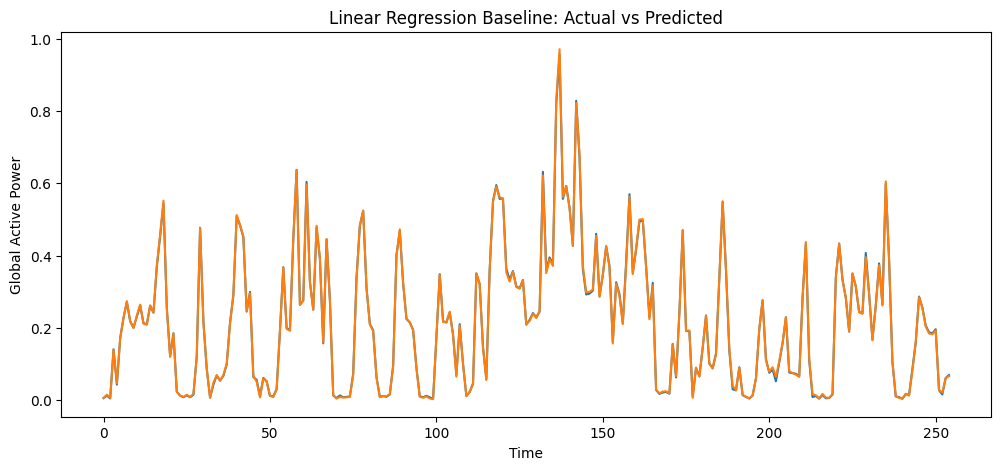

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(y_test.values)
plt.plot(y_pred)
plt.title("Linear Regression Baseline: Actual vs Predicted")
plt.xlabel("Time")
plt.ylabel("Global Active Power")
plt.show()


#save

In [ ]:
feature_df.to_csv("feature_engineered_data.csv")
